In [1]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
### 10x ----
pbmc_scatac = read.table("/home/mnt/weka/nzh/team/woodsqu2/nzhanglab/project/linyx/footprints/PRINT/data/batch_effects/PBMC_atac/obsBias.tsv")
pbmc_multiome = read.table("/home/mnt/weka/nzh/team/woodsqu2/nzhanglab/project/linyx/footprints/PRINT/data/batch_effects/pbmc_multiome/obsBias.tsv")
brain_multi = read.table("/home/mnt/weka/nzh/team/woodsqu2/nzhanglab/project/linyx/footprints/PRINT/data/batch_effects/human_brain_scmultiome/obsBias.tsv")
lymph_node = read.table("/home/mnt/weka/nzh/team/woodsqu2/nzhanglab/project/linyx/footprints/PRINT/data/batch_effects/lymph_node/obsBias.tsv")

### gene silencing  ----
setwd("/home/mnt/weka/nzh/team/woodsqu2/nzhanglab/project/linyx/footprints/PRINT/data/degron")
degron_ctcf_control = read.csv('CTCF/control/mtDNA/obsBias.tsv', sep = '\t')
degron_ctcf_treatment = read.csv('CTCF/treatment/mtDNA/obsBias.tsv', sep = '\t')
degron_polr2a_control = read.csv('POLR2A/control/mtDNA/obsBias.tsv', sep = '\t')
degron_polr2a_treatment = read.csv('POLR2A/treatment/mtDNA/obsBias.tsv', sep = '\t')

### snATAC ----
setwd("/home/mnt/weka/nzh/team/woodsqu2/nzhanglab/project/linyx/footprints/PRINT/data/batch_effects/snATAC_mtDNA/")
obsbias_SAMN18736215 = read.table('SAMN18736215/mtDNA/obsBias.tsv')
obsbias_SAMN18736216 = read.table('SAMN18736216/mtDNA/obsBias.tsv')
obsbias_SAMN27505541 = read.table('SAMN27505541/mtDNA/obsBias.tsv')
obsbias_SAMN27505542 = read.table('SAMN27505542/mtDNA/obsBias.tsv')
obsbias_SAMN27505543 = read.table('SAMN27505543/mtDNA/obsBias.tsv')
obsbias_SAMN27505544 = read.table('SAMN27505544/mtDNA/obsBias.tsv')

obsbias_Control_1 = read.table('Control_1/mtDNA/obsBias.tsv')
obsbias_Control_2 = read.table('Control_2/mtDNA/obsBias.tsv')
obsbias_Control_3 = read.table('Control_3/mtDNA/obsBias.tsv')
obsbias_Control_4 = read.table('Control_4/mtDNA/obsBias.tsv')
obsbias_Control_5 = read.table('Control_5/mtDNA/obsBias.tsv')
obsbias_Control_6 = read.table('Control_6/mtDNA/obsBias.tsv')

obsbias_DN_1 = read.table('DN_1/mtDNA/obsBias.tsv')
obsbias_DN_2 = read.table('DN_2/mtDNA/obsBias.tsv')
obsbias_DN_3 = read.table('DN_3/mtDNA/obsBias.tsv')
obsbias_DN_4 = read.table('DN_4/mtDNA/obsBias.tsv')
obsbias_DN_5 = read.table('DN_5/mtDNA/obsBias.tsv')
obsbias_DN_6 = read.table('DN_6/mtDNA/obsBias.tsv')

obsbias_CKD_1 = read.table('CKD_1/mtDNA/obsBias.tsv')
obsbias_CKD_2 = read.table('CKD_2/mtDNA/obsBias.tsv')
obsbias_CKD_3 = read.table('CKD_3/mtDNA/obsBias.tsv')
obsbias_CKD_4 = read.table('CKD_4/mtDNA/obsBias.tsv')
obsbias_CKD_5 = read.table('CKD_5/mtDNA/obsBias.tsv')

### Multiome ----
setwd("/home/mnt/weka/nzh/team/woodsqu2/nzhanglab/project/linyx/footprints/PRINT/data/batch_effects/multiome_kidney_mtDNA")

obsbias_090922Nx = read.table('090922Nx/mtDNA/obsBias.tsv')
obsbias_091422Nx = read.table('091422Nx/mtDNA/obsBias.tsv')
obsbias_1_27Nx = read.table('1-27Nx/mtDNA/obsBias.tsv')
obsbias_2_15Nx = read.table('2-15Nx/mtDNA/obsBias.tsv')
obsbias_A2 = read.table('A2/mtDNA/obsBias.tsv')
obsbias_AIIM164 = read.table('AIIM164/mtDNA/obsBias.tsv')
obsbias_AIL5160 = read.table('AIL5160/mtDNA/obsBias.tsv')
obsbias_AJDL105 = read.table('AJDL105/mtDNA/obsBias.tsv')
obsbias_AJDV174 = read.table('AJDV174/mtDNA/obsBias.tsv')


In [3]:
head(pbmc_scatac)

,context,insertions,positions,obs_bias,BACInd
,<chr>,<int>,<int>,<dbl>,<int>
4000,GTTATACCCTTCCCGTACTAATTAATCCCCTGGCCCAACCCGTCATCTACTCTACCATCTTTGCAGGCACACTCATCACAGCGCTAAGCTCGCACTGATTT,48,4500,6.2635659,4
4001,TTATACCCTTCCCGTACTAATTAATCCCCTGGCCCAACCCGTCATCTACTCTACCATCTTTGCAGGCACACTCATCACAGCGCTAAGCTCGCACTGATTTT,0,4501,0.0000000,5
4002,TATACCCTTCCCGTACTAATTAATCCCCTGGCCCAACCCGTCATCTACTCTACCATCTTTGCAGGCACACTCATCACAGCGCTAAGCTCGCACTGATTTTT,3,4502,0.3929961,5
4003,ATACCCTTCCCGTACTAATTAATCCCCTGGCCCAACCCGTCATCTACTCTACCATCTTTGCAGGCACACTCATCACAGCGCTAAGCTCGCACTGATTTTTT,2,4503,0.2650919,5
4004,TACCCTTCCCGTACTAATTAATCCCCTGGCCCAACCCGTCATCTACTCTACCATCTTTGCAGGCACACTCATCACAGCGCTAAGCTCGCACTGATTTTTTA,3,4504,0.4303977,5
4005,ACCCTTCCCGTACTAATTAATCCCCTGGCCCAACCCGTCATCTACTCTACCATCTTTGCAGGCACACTCATCACAGCGCTAAGCTCGCACTGATTTTTTAC,3,4505,0.4749216,5


In [4]:
### heatmap ----
setwd("/home/mnt/weka/nzh/team/woodsqu2/nzhanglab/project/linyx/footprints/PRINT/data/batch_effects/multiome_kidney_mtDNA")
obsbias = data.frame('polr2a_control' = degron_polr2a_control$obs_bias, 
                     # 'polr2a_treatment' = degron_polr2a_treatment$obs_bias, 
                     'ctcf_control' = degron_ctcf_control$obs_bias, 
                     # 'ctcf_treatment' = degron_ctcf_treatment$obs_bias, 
                     # "SAMN27505544" = obsbias_SAMN27505544$obs_bias, 
                     # "SAMN18736215" = obsbias_SAMN18736215$obs_bias, 
                     "SAMN18736216" = obsbias_SAMN18736216$obs_bias, 
                     # "SAMN27505541" = obsbias_SAMN27505541$obs_bias, 
                     # "SAMN27505543" = obsbias_SAMN27505543$obs_bias, 
                     # '1_27Nx' = obsbias_1_27Nx$obs_bias, 
                     # '2_15Nx' = obsbias_2_15Nx$obs_bias, 
                     # '091422Nx' = obsbias_091422Nx$obs_bias, 
                     # '090922Nx' = obsbias_090922Nx$obs_bias,
                     'AIL5160' = obsbias_AIL5160$obs_bias, 
                     'AJDV174' = obsbias_AJDV174$obs_bias, 
                     'AIIM164' = obsbias_AIIM164$obs_bias, 
                     # 'brain_multi' = brain_multi$obs_bias, 
                     # "Control_1" = obsbias_Control_1$obs_bias, 
                     # "Control_2" = obsbias_Control_2$obs_bias, 
                     # "Control_3" = obsbias_Control_3$obs_bias, 
                     "DN_1" = obsbias_DN_1$obs_bias, 
                     "CKD_3" = obsbias_CKD_3$obs_bias, 
                     'AJDL105' = obsbias_AJDL105$obs_bias, 
                     'pbmc_multiome' = pbmc_multiome$obs_bias, 
                     # "CKD_4" = obsbias_CKD_4$obs_bias, 
                     # "CKD_5" = obsbias_CKD_5$obs_bias, 
                     # "Control_4" = obsbias_Control_4$obs_bias, 
                     "Control_5" = obsbias_Control_5$obs_bias, 
                     "Control_6" = obsbias_Control_6$obs_bias, 
                     "DN_5" = obsbias_DN_5$obs_bias, 
                     "CKD_2" = obsbias_CKD_2$obs_bias, 
                     # "DN_6" = obsbias_DN_6$obs_bias, 
                     # "DN_2" = obsbias_DN_2$obs_bias, 
                     # "DN_3" = obsbias_DN_3$obs_bias, 
                     # "CKD_1" = obsbias_CKD_1$obs_bias, 
                     # 'dabtram_day10' = obsbias_dabtram_day10$obs_bias, 
                     # 'cis_day10' = obsbias_cis_day10$obs_bias, 
                     # 'A2' = obsbias_A2$obs_bias,
                     # 'dabtram_week5' = obsbias_dabtram_week5$obs_bias,
                     # 'cis_week5' = obsbias_cis_week5$obs_bias, 
                     # 'day0' = obsbias_day0$obs_bias, 
                     "SAMN27505541" = obsbias_SAMN27505541$obs_bias, 
                     'pbmc_scatac' = pbmc_scatac$obs_bias, 
                     'lymph_node' = lymph_node$obs_bias
                    )


In [5]:
cor_plot = cor
cor_data = cor(obsbias) %>%
  as.data.frame() %>%
  rownames_to_column(var = 'sample1') %>%
  pivot_longer(cols = -sample1, 
               names_to = 'sample2', 
               values_to = 'correlation') %>%
  arrange(sample1) %>%
  group_by(sample1) %>%
  filter(row_number() >= which(sample1 == sample2))

cor_data$sample1 = factor(cor_data$sample1, 
                          levels = colnames(obsbias), 
                          labels = gsub("X", "", colnames(obsbias)))
cor_data$sample2 = factor(cor_data$sample2, 
                          levels = rev(colnames(obsbias)), 
                          labels = gsub("X", "", rev(colnames(obsbias))))



In [6]:
head(cor_data)

sample1,sample2,correlation
<fct>,<fct>,<dbl>
AIIM164,AIIM164,1.0000000
AIIM164,DN_1,0.9169261
AIIM164,CKD_3,0.9275263
AIIM164,AJDL105,0.9439546
AIIM164,pbmc_multiome,0.9480774
AIIM164,Control_5,0.9608512


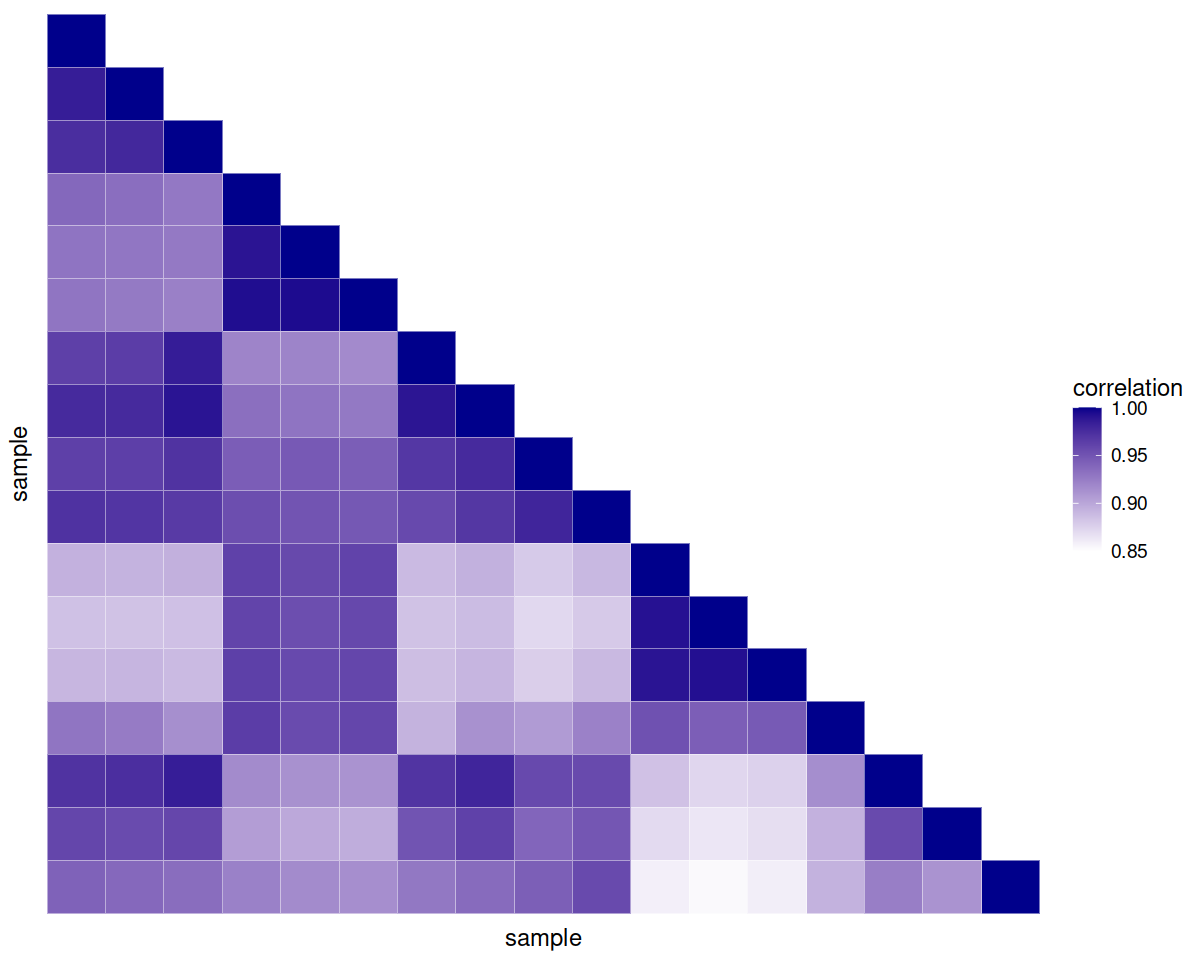

In [7]:
# cor_data$correlation[cor_data$correlation <= 0.8] = 0.81
cor_heatmap = ggplot(cor_data, aes(sample1, sample2)) +
  theme_bw() +
  xlab('sample') +
  ylab('sample') +
  geom_tile(aes(fill = correlation), color='white') +
  scale_fill_gradient(low = 'white', 
                       # mid = '#fff7f3', 
                       # midpoint = 0.92, 
                       high = 'darkblue', 
                       space = 'Lab', 
                       limits = c(0.85, 1)
  ) +
  theme(
    axis.text.x=element_blank(),
    axis.text.y=element_blank(),
    axis.ticks=element_blank(),
    axis.line=element_blank(),
    panel.border=element_blank(),
    panel.grid.major=element_blank(), 
    text = element_text(size = 14)
  )

options(repr.plot.width=10, repr.plot.height=8)
cor_heatmap
